# Введение

In [1]:
# Импорт библиотеки для работы с табличными данными

import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)

# Импорт библиотек для визуализации

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
%matplotlib inline

# Импорт библиотеки для кодирования признаков

import category_encoders as ce

# Загружаем специальный удобный инструмент для разделения датасета

from sklearn.model_selection import train_test_split

# Импорт дополнительных библиотек

from collections import Counter

import numpy as np # linear algebra

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Фиксируем RANDOM_SEED и версию пакетов, чтобы эксперименты были воспроизводимы

RANDOM_SEED = 66
!pip freeze > requirements.txt

In [3]:
# Подгрузим данные из соревнования

DATA_DIR = 'sf-booking'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'/hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [5]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF United Kingdom,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ']",203 day,51.521009,-0.123097


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [7]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel that sold drinking water etc but not necessity Would recommend if like us you arrive late at night to bring drinks from plane airport as there s no shop nearby There is a minibar though if you want to pay those prices,52,16670,Hotel was great clean friendly staff free breakfast every morning with good selection good wifi connection nice sized room with bath fridge in room Personally loved the fact that the hotel isn t in the city centre but is literally next to a train station that you can easily get to and from the airport city Would definitely stay again,62,1,"[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ']",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Netherlands,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ', ' Stayed 1 night ']",234 day,52.385649,4.834443


In [8]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [9]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [10]:
# Для корректной обработки признаков объединяем трейн и тест в один датасет

df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

/tmp/ipykernel_15917/542402287.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем


# Исследование и предобработка данных

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

Видим, что объединенный датасет содержит 515 738 строк и 18 колонок (признаков), в том числе целевой признак reviewer_score и временный sample.

8 признаков относятся к типу object, с каждым из них нужно поработать отдельно, так как из них необходимо извлечь ценные для модели данные и преобразовать их в подходящий формат.

Пропуски в данных встречаются только в колонках lat и lng, с данными признаками поработаем в процессе проектирования признаков.

При ознакомлении с данными явных выбросов не выявлено, все числовые значения лежат в логически объяснимых диапазонах.

В объединенном датасете имеется 336 полных дубликатов строк, однако удалять их не буду, так как есть риск изменения размерности таблиц с тестовой выборкой и сабмишена. Дублей не так много, существенно на результат работы модели они повлиять не должны. 

# Проектирование признаков

### Адрес и название отеля

В признаке hotel_address содержится информация о полном адресе отеля. Строки сформированы по определенному шаблону, поэтому из исходного мы можем выделить новые признаки - город, страна.

In [12]:
# Выделим из адреса отеля в отдельные признака страну и город отеля

data['hotel_country'] = data['hotel_address'].apply(lambda x: 'United Kingdom' if x.split()[-1] == 'Kingdom' else x.split()[-1])
data['hotel_city'] = data['hotel_address'].apply(lambda x: 'London' if x.split()[-5] == 'London' else x.split()[-2])

In [13]:
# Новые признаки содержат всего по 6 уникальных значений, при этом каждой полученной стране соответсвует 1 город

print(data['hotel_country'].unique())
print(data['hotel_city'].unique())

['Italy' 'Netherlands' 'Spain' 'United Kingdom' 'France' 'Austria']
['Milan' 'Amsterdam' 'Barcelona' 'London' 'Paris' 'Vienna']


In [14]:
# Построим столбчатую диаграмму, чтобы понять, влияет ли страна/город отеля на среднюю оценку в отзывах

data_train = data[data['sample'] == 1]
country_ratio = data_train.groupby(by='hotel_country')['reviewer_score'].mean()

fig = px.bar(country_ratio, title='Распределение средних оценок отелей по странам')
fig.update_yaxes(range=[8, 9])
fig.show()

Так как новые признаки дублируют друг друга, в дальнейшем для модели оставим только один - страну отеля (hotel_country), а второй признак (hotel_city) и исходный столбец (hotel_address) удалим. 

Также удаляем и столбец название отеля (hotel_name) - для модели из названия взять нечего. 

In [15]:
# Удаляем признаки hotel_city, hotel_address, hotel_name

data = data.drop(['hotel_city', 'hotel_address', 'hotel_name'], axis=1)

### Координаты отеля

Колонки lat и lng содержат информацию о координатах конкретного отеля. Стоит отметить, что это единственные признаки в датасете с пропусками в данных.

Считаю, что данные признаки не самые информативные. В принципе их можно было бы использовать для более детальной проработки модели, например, чтобы рассчитать расстояние от отеля до центра города. Но данная работа будет трудоемкой (нужно заполнить пропуски в данных, подгрузить координаты центров городов из внешних источников, преобразовать координаты в расстояние), а влияние на итоговый результат кажется мне не настолько существенным.

In [16]:
# Удаляем малоинформативные признаки lat и lng

data = data.drop(['lat', 'lng'], axis=1)

### Национальность гостя

In [17]:
# Посмотрим, какие значения представлены в признаке национальности гостя

uniq_value = data['reviewer_nationality'].nunique()
print(f'В признаке национальности гостя отеля содержится {uniq_value} уникальных значений')

data['reviewer_nationality'].value_counts(normalize=True)

В признаке национальности гостя отеля содержится 227 уникальных значений


 United Kingdom               0.475524
 United States of America     0.068711
 Australia                    0.042048
 Ireland                      0.028749
 United Arab Emirates         0.019845
                                ...   
 Comoros                      0.000002
 Anguilla                     0.000002
 Tuvalu                       0.000002
 Cape Verde                   0.000002
 Palau                        0.000002
Name: reviewer_nationality, Length: 227, dtype: float64

Признак reviewer_nationality содержит информацию о национальности постояльца отеля, который оставил отзыв. Всего в признаке 227 уникальных значений, в том числе и в случаях когда национальность не указана. При этом на долю постояльцев из Англии приходится более 47% всех отзывов.

Из признака можно выделить наиболее популярные национальности постояльцев, а также понять, влияет ли данный признак на среднюю оценку отеля.

In [18]:
# преобразуем исходный признак и оставим только те национальности, представители которых оставили от 1000 отзывов, 
# остальные национальности объединим в обобщенную категорию 'other'

top_nation = data['reviewer_nationality'].value_counts()
top_nation_list = list((top_nation[top_nation >= 1000]).index)
data['top_nationality'] = data['reviewer_nationality'].apply(lambda x: x.strip() if x in top_nation_list else 'other')

In [19]:
# Построим столбчатую диаграмму, чтобы понять, влияет ли национальность постояльца на среднюю оценку в отзывах

data_train = data[data['sample'] == 1]
nation_ratio = data_train.groupby(by='top_nationality')['reviewer_score'].mean().sort_values(ascending=False)

fig = px.bar(nation_ratio, title='Распределение средних оценок отелей от национальности гостя')
fig.update_yaxes(range=[7, 9])
fig.show()

Как видно из графика, средняя оценка сильно зависит от национальности гостя, это можно использовать для построения модели.

Признак национальности гостя можно рассмотреть и с другой стороны. Выделим отдельный признак для поездок внутри страны, когда национальность постояльца и страна отеля совпадают - то есть выделим сегмент поездок внутри страны. 
Проверим, влияет ли данный фактор на среднюю оценку в отвывах.

In [20]:
# Создадим отдельный признак, фиксирующий, когда поездка была внутри страны

def get_domestic_trip(row):
    if row['top_nationality'] == (row['hotel_country']):
        return 1
    else:
        return 0

data['domestic_trip'] = data[['top_nationality', 'hotel_country']].apply(get_domestic_trip, axis=1)  

display(data['domestic_trip'].value_counts(normalize=True))

0    0.654082
1    0.345918
Name: domestic_trip, dtype: float64

In [21]:
# Построим столбчатую диаграмму, чтобы понять, влияют ли внутренние путешешствия на среднюю оценку в отзывах

data_train = data[data['sample'] == 1]
domestic_ratio = data_train.groupby(by='domestic_trip')['reviewer_score'].mean()

fig = px.bar(domestic_ratio, title='Распределение средних оценок отелей для внутренних и заграничных поездок')
fig.update_yaxes(range=[8, 9])
fig.show()

Анализ показал, что люди, путешествующие внутри страны, ставят оценки чуть выше, чем зарубежные постояльцы. Однако разница в средних значениях очень мала, возможно данный признак при оценке будет исключен.

In [22]:
# Удаляем исходный признак reviewer_nationality

data = data.drop(['reviewer_nationality'], axis=1)

### Дата отзыва

Дата оставления отзыва представлена в строковом формате. Сперва нужно перевести ее в формат datetime, а затем попытаться извлечь из нее полезную информацию для построения модели.

In [23]:
# Переведем строковый формат даты оставления отзыва в datetime

data['review_date'] = pd.to_datetime(data['review_date'])

# Выделим из даты месяц и день недели

data['review_month'] = data['review_date'].dt.month
data['review_day_of_week'] = data['review_date'].dt.dayofweek

Проверим, влияет ли сезонность и день недели на средние оценки по отзывам на отели.

In [24]:
# Построим столбчатую диаграмму, чтобы понять, влияет ли сезонность на среднюю оценку в отзывах

data_train = data[data['sample'] == 1]
season_count = data_train.groupby(by='review_month')['reviewer_score'].count()
season_ratio = data_train.groupby(by='review_month')['reviewer_score'].mean()

fig = px.bar(season_count, title='Распределение числа отзывов от месяца года')
fig.show()

fig = px.bar(season_ratio, title='Распределение средних оценок отелей от месяца года')
fig.update_yaxes(range=[8, 9])
fig.show()

In [25]:
# Построим столбчатую диаграмму, чтобы понять, влияет ли день недели на среднюю оценку в отзывах

data_train = data[data['sample'] == 1]
day_count = data_train.groupby(by='review_day_of_week')['reviewer_score'].count()
day_ratio = data_train.groupby(by='review_day_of_week')['reviewer_score'].mean()

fig = px.bar(day_count, title='Распределение числа отзывов по дням недели')
# fig.update_yaxes(range=[8, 9])
fig.show()

fig = px.bar(day_ratio, title='Распределение средних оценок отелей от дня недели')
fig.update_yaxes(range=[8, 9])
fig.show()

Из графиков видно, что отели имеют явную сезонность по месяцам - с февраля по август идет рост числа постояльцев отелей (соответсвенно и исла отзывов), в августе пик и затем постепенный спад до февраля.
При этом прослеживается обратная связ со средними оценками в отзывах - чем меньше в месяце было гостей, тем выше оценки отелю.

Анализ отзывов по дням недели показал, что максимальное число отзывов приходится на вторник, воскресенье и понедельник (по убыванию). Средние же оценки по дням колеблются не так вильно, но наиболее высокие средние пококазатели можно также соотнести с днями, когда отзывов было больше всего.

In [26]:
# Удаляем исходный признак review_date

data = data.drop(['review_date'], axis=1)

Признак days_since_review показывает "количество дней между датой проверки и датой очистки". Однако, что это означает на практике и несет ли данный признак какую-то полезную информацию, не понятно.

Попробуем преобразовать его в числовой формат и передадим в модель в том виде, как он есть.

In [27]:
data['days_since_review'] = data['days_since_review'].apply(lambda x: int(x.split()[0]))

### Теги

В тегах к отзывам содержится информация о деталях размещения гостя в отеле (тип поездки, число ночей в отеле и т.д.). Ее извлечение и преобразование позволит дополнить модель важными для анализа признаками.

In [28]:
# Преобразуем строковый формат данных в исходном признаке в список уникальных тегов

def get_tags_list(tags):
    tags_list = tags.replace("[' ", '').replace(" ']", '').replace(" ', ' ", ', ')
    tags_list = tags_list.split(', ')
    return tags_list

data['tags_list'] = data['tags'].apply(get_tags_list)

In [29]:
# Получим список уникальных тегов, используемых в датасете и посмотрим на самые популярные из них

tags_counter = Counter()
for i in data.tags_list:
    tags_counter += Counter(i)

display(tags_counter.most_common(30))

[('Leisure trip', 417778),
 ('Submitted from a mobile device', 307640),
 ('Couple', 252294),
 ('Stayed 1 night', 193645),
 ('Stayed 2 nights', 133937),
 ('Solo traveler', 108545),
 ('Stayed 3 nights', 95821),
 ('Business trip', 82939),
 ('Group', 65392),
 ('Family with young children', 61015),
 ('Stayed 4 nights', 47817),
 ('Double Room', 35207),
 ('Standard Double Room', 32248),
 ('Superior Double Room', 31393),
 ('Family with older children', 26349),
 ('Deluxe Double Room', 24823),
 ('Double or Twin Room', 22393),
 ('Stayed 5 nights', 20845),
 ('Standard Double or Twin Room', 17483),
 ('Classic Double Room', 16989),
 ('Superior Double or Twin Room', 13570),
 ('2 rooms', 12393),
 ('Stayed 6 nights', 9776),
 ('Standard Twin Room', 9745),
 ('Single Room', 9670),
 ('Twin Room', 8321),
 ('Stayed 7 nights', 7399),
 ('Executive Double Room', 6425),
 ('Classic Double or Twin Room', 6107),
 ('Superior Twin Room', 6064)]

Анализ тегов показал, что все их можно разделить на несколько смысловых групп:
1. Тип поездки: деловая (Business trip) или отдых (Leisure trip).
2. Число гостей: один (Solo traveler), пара (Couple), группа (Group и Travelers with Friends), семья с детьми (Family with older children и Family with young children).
3. Число ночей: от 1 до 30 ночей (Stayed .. night(s)).
4. Бронирование с мобильного телефона (Submitted from a mobile device).

Кроме того, подавляющее большинство уникальных тегов приходится на описание размера/типа номера, однако при этом единого формата записи нет, описания разнятся и как-либо классифицировать их не представляется возможным. Использовать такие данные для обучения модели считаю некорректным.

Выделенные выше смысловые группы тегов можно использовать для обучения модели, поэтому преобразуем эти данные в отдельные признаки.

In [30]:
# Получим полный список уникальных тегов

tag_list = list(tags_counter)

In [31]:
# Выделим из тегов признак "тип поездки" (0 - деловая, 1 - отдых)

def get_type_of_trip(tag):
    if 'Business trip' in tag:
        return 0
    elif 'Leisure trip' in tag:
        return 1

data['tag_type_of_trip'] = data['tags_list'].apply(get_type_of_trip)

# Выделим из тегов признак "число гостей" (1 - соло, 2 - пара, 3 - группа, 4 - семья с детьми)

def get_person_count(tag):
    if 'Solo traveler' in tag:
        return 1
    elif 'Couple' in tag:
        return 2
    elif 'Group' in tag or 'Travelers with Friends' in tag:
        return 3
    elif 'Family with older children' in tag or 'Family with young children' in tag:
        return 4

data['tag_person_count'] = data['tags_list'].apply(get_person_count)

# Выделим из тегов признак "число ночей в отеле" (от 1 до 30 ночей)

def get_nights_count(tag):
    if 'Stayed 1 night' in tag:
        return 1
    elif True:
        num_list = list(range(2, 31))
        for num in num_list:
            mask = 'Stayed ' + str(num) + ' nights'
            if mask in tag:
                return num

data['tag_nights'] = data['tags_list'].apply(get_nights_count)

# Выделим из тегов признак "бронирование с мобильного телефона" (1 - да, 0 - нет)

data['tag_mobile_booking'] = data['tags_list'].apply(lambda x: 1 if 'Submitted from a mobile device' in x else 0)

In [32]:
# Проверим новые признаки на наличие пропусков

data.isnull().sum()

additional_number_of_scoring                      0
average_score                                     0
negative_review                                   0
review_total_negative_word_counts                 0
total_number_of_reviews                           0
positive_review                                   0
review_total_positive_word_counts                 0
total_number_of_reviews_reviewer_has_given        0
tags                                              0
days_since_review                                 0
sample                                            0
reviewer_score                                    0
hotel_country                                     0
top_nationality                                   0
domestic_trip                                     0
review_month                                      0
review_day_of_week                                0
tags_list                                         0
tag_type_of_trip                              15021
tag_person_c

Полученные из тегов признаки имеют пропуски в данных. Скорее всего, они появились из-за того, что теги не обязательны для заполнения и некоторые люди их не указывают при отправке отзыва. В целом пропусков не так много - в признаке "тип поездки" около 3%, а в признаках "число гостей" и "число ночей" и вовсе менее 0,5%.

Для устранения пропусков в данных считаю самым целесообразным в данном случае заменить их модой.

In [33]:
# Заполняем пропуски в данных модой

values = {
    'tag_type_of_trip':data['tag_type_of_trip'].mode()[0],
    'tag_person_count':data['tag_person_count'].mode()[0],
    'tag_nights':data['tag_nights'].mode()[0]    
}
data = data.fillna(values)

In [34]:
# Построим столбчатую диаграмму, чтобы понять, влияет ли тип поездки на среднюю оценку в отзывах

data_train = data[data['sample'] == 1]
type_of_trip_ratio = data_train.groupby(by='tag_type_of_trip')['reviewer_score'].mean()

fig = px.bar(type_of_trip_ratio, title='Распределение средних оценок от типа поездки')
fig.update_yaxes(range=[7, 9])
fig.show()

График показывает, что гости, останавливающиеся в отеле во время отдыха, ставят оценки отелю существенно выше, чем те, кто приехал в деловую поездку.

In [35]:
# Построим столбчатую диаграмму, чтобы понять, влияет ли компания, в которой приехали гости, на среднюю оценку в отзывах

data_train = data[data['sample'] == 1]
person_count_ratio = data_train.groupby(by='tag_person_count')['reviewer_score'].mean()

fig = px.bar(person_count_ratio, title='Распределение средних оценок от числа гостей')
fig.update_yaxes(range=[7, 9])
fig.show()

График показывает, что средняя оценка отеля зависит и от числа гостей, которые заселились в номер. Самые низкие оценки ставят гости-одиночки, самые высокие - пары.

In [36]:
# Построим столбчатую диаграмму, чтобы понять, влияет ли бронирование с мобильного телефона, на среднюю оценку в отзывах

data_train = data[data['sample'] == 1]
mobile_booking_ratio = data_train.groupby(by='tag_mobile_booking')['reviewer_score'].mean()

fig = px.bar(mobile_booking_ratio, title='Распределение средних оценок от бронирования с телефона')
fig.update_yaxes(range=[8, 9])
fig.show()

График показал, что существенной взаимосвязи оценок от способа бронирования номера не наблюдается. Возможно, этот признак при построении модели окажется малоинформативным.

In [37]:
# Построим столбчатую диаграмму, чтобы понять, влияет ли число ночей в отеле, на среднюю оценку в отзывах

data_train = data[data['sample'] == 1]
nights_count = data_train.groupby(by='tag_nights')['reviewer_score'].count()
nights_mean = data_train.groupby(by='tag_nights')['reviewer_score'].mean()

fig = px.bar(nights_count, title='Распределение числа отзывов от числа ночей в отеле')
fig.show()

fig = px.bar(nights_mean, title='Распределение средних оценок от числа ночей в отеле')
fig.update_yaxes(range=[5, 9])
fig.show()

По получившимся графикам можно сделать два важных вывода: 
* подавляющее большинство гостей остаются в отелях на срок от 1 до 10 дней (чем меньше ночей, тем больше отзывов), на более продолжительный срок остаются единицы;
* чем дольше гости остаются в отеле, тем хуже они ставят оценки в отзывах, прослеживается плавный спад по оценкам.

Распределение оценок от постояльцев, которые жили в отеле более 12 ночей, становится хаотичным. Таких гостей очень мало и опираться на данные по ним для построения модели нельзя. Чтобы избежать искажения в данных, объединим такие отзывы (13-30 ночей) в одну группу. 

In [38]:
# Объединим в одну группу постояльцев, проживших в отеле 13-30 ночей

data['tag_nights'] = data['tag_nights'].apply(lambda x: x if x < 13 else 13)
data['tag_nights'].value_counts()

# Построим столбчатую диаграмму, чтобы проверить, как изменилось распределение

data_train = data[data['sample'] == 1]
nights_mean = data_train.groupby(by='tag_nights')['reviewer_score'].mean()

fig = px.bar(nights_mean, title='Распределение средних оценок от числа ночей в отеле')
fig.update_yaxes(range=[7, 9])
fig.show()

In [39]:
# Удаляем исходный признак tags и временный tags_list 

data = data.drop(['tags', 'tags_list'], axis=1)

### Негативные и позитивные отзывы

Анализ текстов негативных и позитивных отзывов показал, что все они заполнены в свободной форме, часто с ошибками, сленгом, непонятными сокращениями, символами. 
Встречаются и отзывы с обратным смыслом, например, когда в негативном отзыве написано "all good".

Глубокая обработка текстов отзывов возможно дала бы какие-то результаты для модели. Из идей - это ручная и полуавтоматическая обработка отзывов, исправление ошибок и сокращение числа уникальных значений, выделение категорий с негативным, позитивным и нейтральным смыслом отзывов, использование библиотек для семантического разбора фраз (сразу скажу, что будут плохо работать на коротких отзывах). Но я сомневаюсь, что вложенные в это время и силы выведут модель на качественно новый уровень. 

Для передачи в модель попробуем вытащить из этих признаков минимально значимую информацию:
* разделим негативные отзывы на явно негативные и нейтральные (в которых используются фразы типа 'no negative', 'nothing');
* аналогичное разделение выполним и для позитивных отзывов.

In [40]:
# Уберем из отзывов лишние пробельные символы, приведем их нижнем регистру

data['negative_review'] = data['negative_review'].apply(lambda x: x.strip().lower())
data['positive_review'] = data['positive_review'].apply(lambda x: x.strip().lower())


data['negative_review'].value_counts().head(30)
x = list(data['negative_review'].value_counts().head(30).index)

In [41]:
# Выведем чаще всего встречающиеся тексты негативных отзывов и вручную выберем из них нейтральные формулировки

# data['negative_review'].value_counts().head(30)
neutral_neg_review = ['no negative',
 'nothing',
 'n a',
 'none',
 '',
 'nothing really',
 'all good',
 'no complaints',
 'nothing to dislike',
 'everything was perfect',
 'na',
 'everything was great',
 'nothing to complain about',
 'no',
 'nothing all good']

# Создаем новый признак для оценки негативности отзывов (0 - нейтральный, 1 - негативный)
data['neg_review'] = data['negative_review'].apply(lambda x: 0 if x in neutral_neg_review else 1)
data['neg_review'].value_counts()

1    359045
0    156693
Name: neg_review, dtype: int64

In [42]:
# Выведем чаще всего встречающиеся тексты позитивных отзывов и вручную выберем из них нейтральные формулировки

# data['positive_review'].value_counts().head(30)
neutral_pos_review = ['no positive',  'nothing']

# Создаем новый признак для оценки позитивности отзывов (0 - нейтральный, 1 - позитивный)
data['pos_review'] = data['positive_review'].apply(lambda x: 0 if x in neutral_pos_review else 1)
data['pos_review'].value_counts()

1    478061
0     37677
Name: pos_review, dtype: int64

In [43]:
# Построим столбчатую диаграмму, чтобы понять, влияет ли число ночей в отеле, на среднюю оценку в отзывах

data_train = data[data['sample'] == 1]
neg_ratio = data_train.groupby(by='neg_review')['reviewer_score'].mean()
pos_ratio = data_train.groupby(by='pos_review')['reviewer_score'].mean()

fig = px.bar(neg_ratio, title='Распределение средних оценок от негативности отзыва')
fig.update_yaxes(range=[7, 10])
fig.show()

fig = px.bar(pos_ratio, title='Распределение средних оценок от позитивности отзыва')
fig.update_yaxes(range=[6, 9])
fig.show()

По диаграммам видно, что разделение текстов отзывов на нейтральные и негативные/позитивные дает нам именно такое распределение, как и ожидалось:
* если в отзыве явно не прописан негатив, то средняя оценка такого отзыва значительно выше, чем с негативом;
* если в отзыве явно не прописан позитив, то средняя оценка такого отзыва значительно ниже, чем с позитивом.

In [44]:
# Удаляем исходные признаки с текстами отзывов

data = data.drop(['negative_review', 'positive_review'], axis=1)

# Отбор признаков

In [45]:
# Посмотрим, как выглядит датасет после преобразования признаков

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   days_since_review                           515738 non-null  int64  
 7   sample                                      515738 non-null  int64  
 8   reviewer_score                              515738 non-null  float64
 9   hotel_country                               515738 non-null  object 
 

In [46]:
data.head()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,sample,reviewer_score,hotel_country,top_nationality,domestic_trip,review_month,review_day_of_week,tag_type_of_trip,tag_person_count,tag_nights,tag_mobile_booking,neg_review,pos_review
0,904,8.1,52,16670,62,1,13,0,0.0,Italy,United Kingdom,0,7,4,1.0,2.0,2.0,0,1,1
1,612,8.6,10,5018,0,7,234,0,0.0,Netherlands,Belgium,0,12,0,1.0,3.0,1.0,0,1,0
2,46,8.3,3,351,5,15,616,0,0.0,Spain,Sweden,0,11,3,0.0,1.0,1.0,1,1,1
3,241,9.1,0,1543,27,9,656,0,0.0,Italy,United States of America,0,10,5,1.0,2.0,1.0,0,0,1
4,834,9.1,0,4687,7,2,444,0,0.0,Netherlands,United Kingdom,0,5,0,0.0,1.0,2.0,1,0,1


Практически все признаки представлены в числовом формате. Остается закодировать лишь 2 категориальных признака:
* hotel_country - методом OneHot Encoding;
* top_nationality - методом Binary Encoding.

In [47]:
# Кодируем категориальные признаки подходящими методами

bin_encoder = ce.BinaryEncoder(data['top_nationality']) 
data_bin = bin_encoder.fit_transform(data['top_nationality'])
data = pd.concat([data, data_bin], axis=1)

encoder = ce.OneHotEncoder(cols=['hotel_country'], use_cat_names=True) 
data_bin = encoder.fit_transform(data['hotel_country'])
data = pd.concat([data, data_bin], axis=1)

In [48]:
# Удаляем исходные столбцы hotel_country и top_nationality

data = data.drop(['hotel_country', 'top_nationality'], axis=1)

Проверим подготовленные данные на наличие корреляций и мультиколлинеарности. Так как данные распределены не нормально воспользуемся корреляцией Спирмена.

Для визуальзации построим тепловую матрицу корреляций.

<AxesSubplot: >

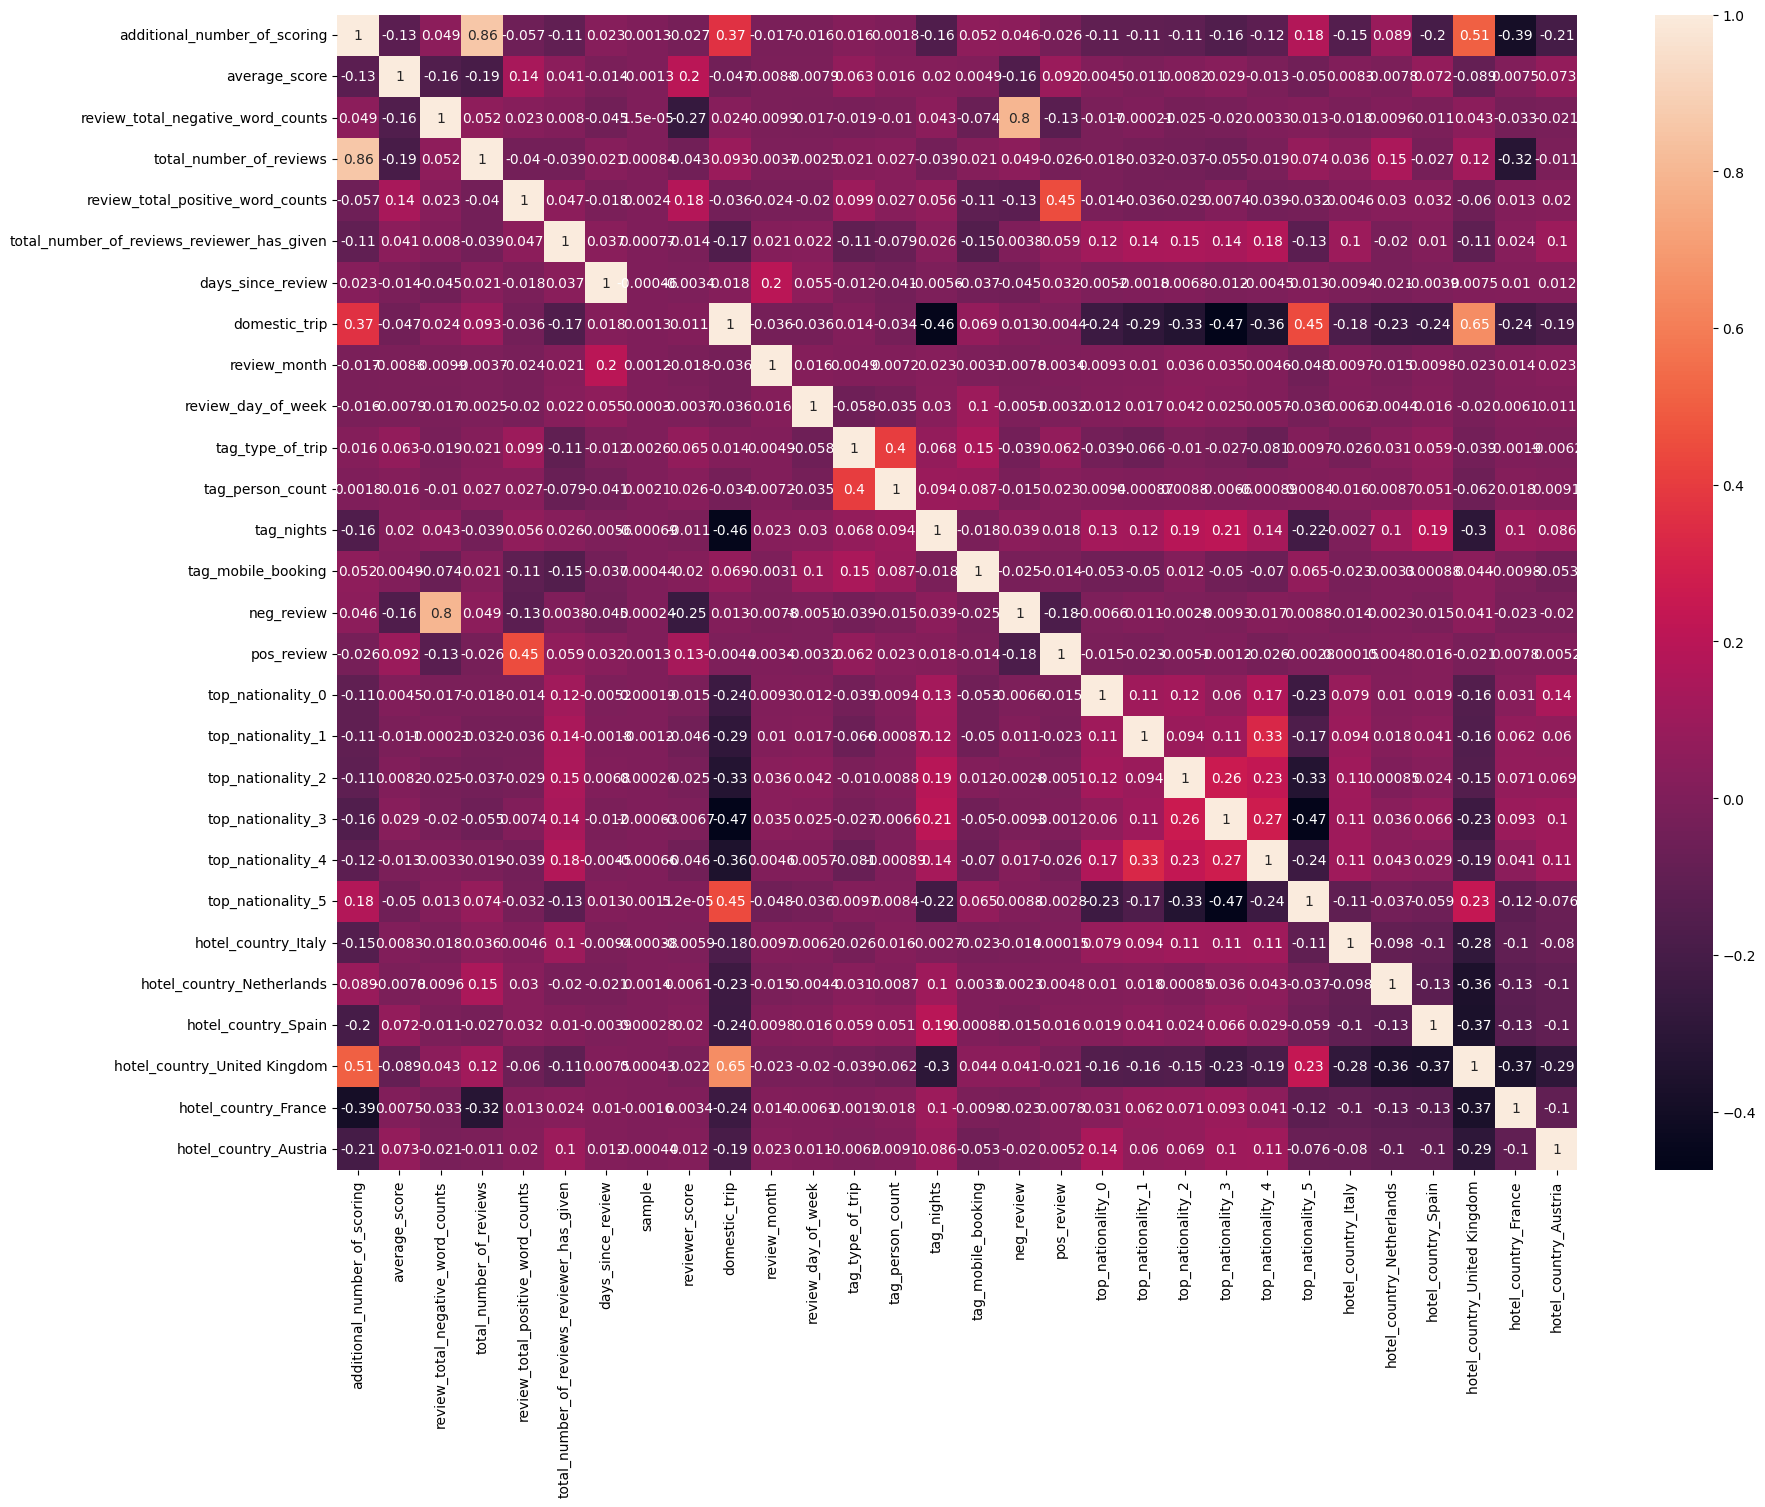

In [49]:
corr_spearman = data.corr(method='spearman')

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr_spearman.drop(['sample', 'reviewer_score']), annot=True)

По тепловой матрице видим мультиколлинеарность в двух парах признаков:
* total_number_of_reviews и additional_number_of_scoring;
* review_total_negative_word_counts и neg_review. 

Удалим из этих пар вторые признаки, чтобы не передавать в модель сильно скореллированные данные.

In [50]:
# Удаляем признаки additional_number_of_scoring и neg_review

data = data.drop(['additional_number_of_scoring', 'neg_review'], axis=1)

# Построение модели ML и ее обучение

In [51]:
# Теперь выделим тестовую часть

train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [52]:
# Воспользуемся специальной функцией train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [53]:
# проверяем

test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 27), (386803, 27), (386803, 26), (309442, 26), (77361, 26))

In [54]:
# Импортируем необходимые библиотеки:

from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [55]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)

model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [56]:
# Обучаем модель на тестовом наборе данных

model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred

y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.5s finished


In [57]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются.
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднее отклонение предсказанных значений от фактических.

def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.ones(len(y_true)), np.abs(y_true))))*100

print('MAPE:', MAPE(y_test, y_pred))

MAPE: 13.39669925227832


<AxesSubplot: >

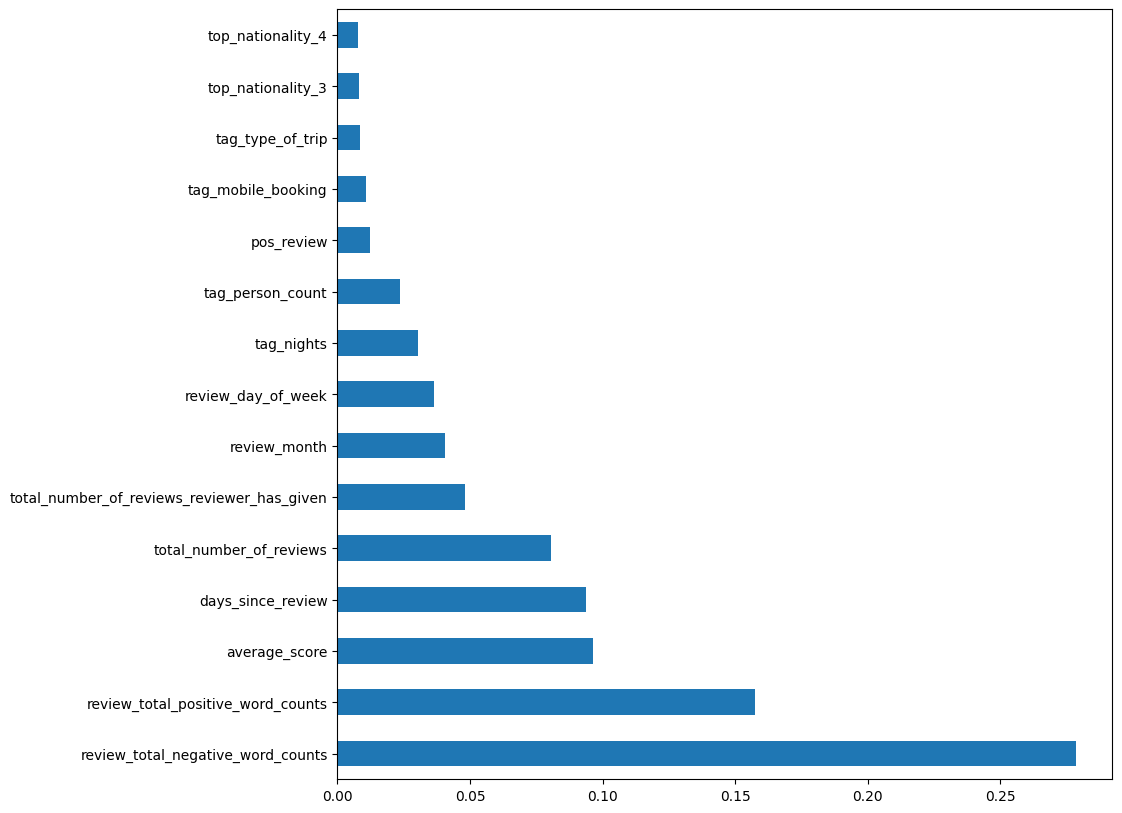

In [58]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели

plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [59]:
test_data.sample(10)

,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,days_since_review,reviewer_score,domestic_trip,review_month,review_day_of_week,...,top_nationality_2,top_nationality_3,top_nationality_4,top_nationality_5,hotel_country_Italy,hotel_country_Netherlands,hotel_country_Spain,hotel_country_United Kingdom,hotel_country_France,hotel_country_Austria
97083,7.3,5,3609,5,1,382,0.0,0,7,6,...,0,0,0,0,0,0,0,1,0,0
42703,6.9,144,747,91,1,65,0.0,1,5,1,...,0,0,0,1,0,0,0,1,0,0
38703,8.3,2,2826,5,6,318,0.0,0,9,0,...,1,0,0,0,0,0,0,1,0,0
17817,8.4,9,4568,11,7,92,0.0,0,5,2,...,1,0,0,0,1,0,0,0,0,0
66638,8.5,0,217,16,1,224,0.0,1,12,3,...,0,0,0,1,0,0,0,1,0,0
98290,9.0,0,817,26,1,350,0.0,0,8,3,...,1,0,0,0,0,0,0,0,1,0
124191,8.8,0,2094,83,5,25,0.0,0,7,6,...,1,1,0,0,0,0,1,0,0,0
22750,9.0,36,4192,9,1,317,0.0,0,9,1,...,1,0,0,0,1,0,0,0,0,0
75065,7.8,40,1717,22,5,139,0.0,1,3,4,...,0,0,0,1,0,0,0,1,0,0
67103,8.0,57,768,12,1,460,0.0,1,4,5,...,0,0,0,1,0,0,0,1,0,0


In [60]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [61]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [62]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.7s finished


In [63]:
predict_submission

array([8.833, 7.064, 8.035, ..., 7.895, 9.58 , 7.273])

In [64]:
list(sample_submission)

['reviewer_score', 'id']

In [ ]:
# sample_submission['reviewer_score'] = predict_submission
# sample_submission.to_csv('submission.csv', index=False)
# sample_submission.head(10)